# Bird Classification Project
---

You will use the [Bird Species dataset](https://www.kaggle.com/datasets/umairshahpirzada/birds-20-species-image-classification/data) from Kaggle.

### The dataset contains:
- 20 bird species
- 3208 training images, 100 test images(5 images per species)
- 100 validation images (5 images per species)

Your goal is to build an image classification model with the best possible performance. You will work in a group, and at the end, as a group you will present your work to your instructor and classmates.

### Requirements:
- Compile a classification model (you can choose any image classification model you want).
- Your accuracy should be at least 85%
- Save your final model, and use the images in "images to predict" to evaluate its performance during the group presentation
- Save your final work in a public Github repository

### Tips:
- Use Google Colab for larger/more complex models
- Consider using data augmentation to improve your model's performance
- Make sure to read the datasets [Data Card](https://www.kaggle.com/datasets/umairshahpirzada/birds-20-species-image-classification/data) to get a better understanding of the images and the structure/dimensions of the files

### Good Luck!

In [53]:
# Imports

import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
from PIL import Image
import glob

In [54]:
# Define path to data directories

# Note: Saved 'images to predict', 'test', 'train' and 'valid' folders in a new folder called 'Bird_Data'.

train_dir = '../Bird_Data/train/'
valid_dir = '../Bird_Data/valid/'
test_dir = '../Bird_Data/test/'
images_to_predict_dir = '../Bird_Data/images to predict/'


# Want to see each folder and one of their contents (ex: ABBOTTS BABBLER)

print("For train_dir")
print(os.listdir(train_dir))
train_abbots_babbler_dir = os.path.join(train_dir, 'ABBOTTS BABBLER')
print(os.listdir(train_abbots_babbler_dir))

#Note: "dashed_line()" function is being used to seperate the outputs. 
def dashed_line(length):
    print('-' * length)
dashed_line(150)

print("For valid_dir")
print(os.listdir(valid_dir))
valid_abbots_babbler_dir = os.path.join(valid_dir, 'ABBOTTS BABBLER')
print(os.listdir(valid_abbots_babbler_dir))

dashed_line(150)

print("For test_dir")
print(os.listdir(test_dir))
test_abbots_babbler_dir = os.path.join(test_dir, 'ABBOTTS BABBLER')
print(os.listdir(test_abbots_babbler_dir))

dashed_line(150)

print("For images_to_predict_dir")
print(os.listdir(images_to_predict_dir))

For train_dir
['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'AFRICAN PIED HORNBILL', 'AFRICAN PYGMY GOOSE', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN FLAMINGO', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL']
['001.jpg', '002.jpg', '003.jpg', '004.jpg', '005.jpg', '006.jpg', '007.jpg', '008.jpg', '009.jpg', '010.jpg', '011.jpg', '012.jpg', '013.jpg', '014.jpg', '015.jpg', '016.jpg', '017.jpg', '018.jpg', '019.jpg', '020.jpg', '021.jpg', '022.jpg', '023.jpg', '024.jpg', '025.jpg', '026.jpg', '027.jpg', '028.jpg', '029.jpg', '030.jpg', '031.jpg', '032.jpg', '033.jpg', '034.jpg', '035.jpg', '036.jpg', '037.jpg', '038.jpg', '039.jpg', '040.jpg', '041.jpg', '042.jpg', '043.jpg', '044.jpg', '045.jpg', '046.jpg', '047.jpg', '048.jpg', '049.jpg', '050.jpg', '051.j

012.jpg
------------------------------------------------------------------------------------------------------------------------------------------------------


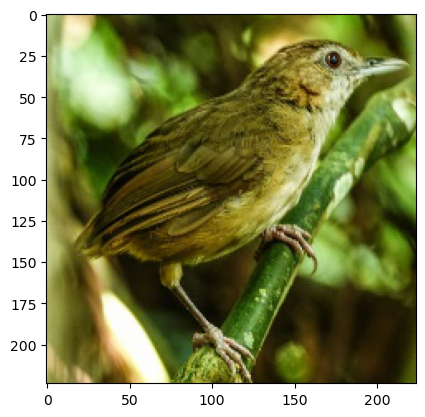

In [55]:
# Image view: train, 'ABBOTTS BABBLER', '012.jpg'

import matplotlib.pyplot as plt
from skimage.io import imread
import os


print(os.listdir(train_dir+ 'ABBOTTS BABBLER')[11])
# Output is '012.jpg'

dashed_line(150)

# Define the file path
train_ABBOTTS_BABBLER_12 = os.path.join(train_dir, 'ABBOTTS BABBLER', '012.jpg')

# Read the image
train_ABBOTTS_BABBLER_12_img = imread(train_ABBOTTS_BABBLER_12)

# Display the image
plt.imshow(train_ABBOTTS_BABBLER_12_img)  
plt.show()

# Note: Image from train/'ABBOTTS BABBLER' is correct.

In [56]:
# Train ImageDataGenerator
# Create instance of ImageDataGenerator for preprocessing purposes

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,            
    width_shift_range=0.2,         
    height_shift_range=0.2,        
    shear_range=0.2,               
    zoom_range=0.2,                
    horizontal_flip=True,                    
    fill_mode='nearest',
)

# Create the training data generator

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  
    batch_size=32,           
    class_mode='categorical',  
    shuffle=True,                     
)

# Note: From Kaggle: "All images are 224 X 224 X 3 color images in jpg format."
# Use target_size=(224, 224) and/or input_shape=(224, 224,3). 

Found 3208 images belonging to 20 classes.


In [57]:
# Valid ImageDataGenerator
# Create instance of ImageDataGenerator for preprocessing purposes

# NOTE: READ BELOW!!!
# For the validation generator, usually:
# DO NOT apply any augmentation (i.e., no random transformations like rotation, zoom, shift, etc.).
# Only apply rescaling to normalize the pixel values (if necessary).

valid_gen = ImageDataGenerator(
    rescale=1/255,
    )

# Create the validation data generator

valid_data = valid_gen.flow_from_directory(
    valid_dir,                        
    target_size=(224, 224),           
    batch_size=32,                    
    class_mode='categorical',         
    shuffle=False,                    
)

# Note: From Kaggle: "All images are 224 X 224 X 3 color images in jpg format."
# Use target_size=(224, 224) and/or input_shape=(224, 224,3). 

Found 100 images belonging to 20 classes.


In [58]:
# Test ImageDataGenerator
# Create instance of ImageDataGenerator for preprocessing purposes

test_gen = ImageDataGenerator(
    rescale=1/255,
    )

# Create the test data generator

test_data = test_gen.flow_from_directory(
    test_dir,                        
    target_size=(224, 224),           
    batch_size=32,                    
    class_mode='categorical',         
    shuffle=False,                                       
)

# Note: From Kaggle: "All images are 224 X 224 X 3 color images in jpg format."
# Use target_size=(224, 224) and/or input_shape=(224, 224,3). 

Found 100 images belonging to 20 classes.


In [59]:
# Import VGG16

# Import libraries
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Load pre-trained VGG16 model
base_model = VGG16(
    weights='imagenet',          
    include_top=False,           
    input_shape=(224, 224, 3)    
)


base_model.trainable = False

# Build model
model = models.Sequential([
    base_model,  
    layers.GlobalAveragePooling2D(),  
    layers.Dense(256, activation='relu'),  
    layers.Dropout(0.5),  
    layers.Dense(len(train_data.class_indices), activation='softmax')  # Output layer with 'softmax' for multi-class classification
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-3),   # A (smaller) learning rate for fine-tuning
    loss='categorical_crossentropy',      # For multi-class classification
    metrics=['accuracy']                  # Track accuracy during training
)

# Summary of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │         5,140 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,851,156 (56.65 MB)

 Trainable params: 136,468 (533.08 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [60]:
# Use Google Colab to speed up training

# from google.colab import drive
# drive.mount('/content/drive')

# ModuleNotFoundError: No module named 'google.colab'

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# Training the model

from tensorflow.keras.callbacks import EarlyStopping

# EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=5,          
    verbose=1  
)


# Train the model
history = model.fit(
    train_data,    
    epochs=20,  
    validation_data=valid_data, 
    callbacks=[early_stopping]
)

In [ ]:
# Evaluate the model on the test data

test_loss, test_accuracy = model.evaluate(
    test_data,      
)

test_accuracy